# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanyang
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | isiro
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | waipawa
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | marcona
City not found. Skipping...
Processing Record 11 of Set 1 | aykhal
Processing Record 12 of Set 1 | mersin
Processing Record 13 of Set 1 | mangaratiba
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | garowe
Processing Record 17 of Set 1 | wukari
Processing Record 18 of Set 1 | suileng
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | leningr

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nanyang,32.9947,112.5328,22.43,37,99,3.26,CN,1681269501
1,severo-kurilsk,50.6789,156.1250,-0.40,71,85,4.82,RU,1681269501
2,puerto ayora,-0.7393,-90.3518,26.42,89,61,0.45,EC,1681269501
3,isiro,2.7739,27.6160,18.73,99,100,1.32,CD,1681269502
4,waipawa,-41.4122,175.5153,17.92,59,66,3.28,NZ,1681269503


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nanyang,32.9947,112.5328,22.43,37,99,3.26,CN,1681269501
1,severo-kurilsk,50.6789,156.1250,-0.40,71,85,4.82,RU,1681269501
2,puerto ayora,-0.7393,-90.3518,26.42,89,61,0.45,EC,1681269501
3,isiro,2.7739,27.6160,18.73,99,100,1.32,CD,1681269502
4,waipawa,-41.4122,175.5153,17.92,59,66,3.28,NZ,1681269503


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

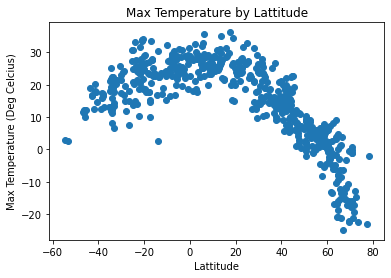

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Max Temperature (Deg Celcius)')
plt.title("Max Temperature by City Lattitude")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

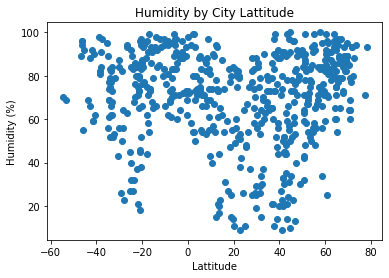

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

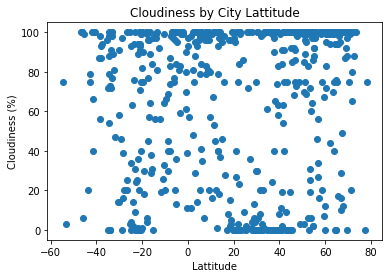

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

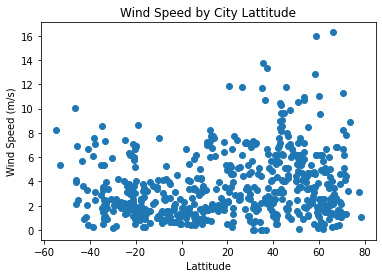

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("Wind Speed by City Lattitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linreg(x,y,a,b):
    slope, intercept, r, p, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"green")
    plt.annotate(line_eq, xy=(a, b), xycoords='axes fraction',fontsize=15,color="green")
    print(f"The r is: {r}")
    print(f"The r-squared is: {r**2}")

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat'] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nanyang,32.9947,112.5328,22.43,37,99,3.26,CN,1681269501
1,severo-kurilsk,50.6789,156.1250,-0.40,71,85,4.82,RU,1681269501
3,isiro,2.7739,27.6160,18.73,99,100,1.32,CD,1681269502
5,albany,42.6001,-73.9662,18.27,45,100,6.92,US,1681269325
7,aykhal,66.0000,111.5000,-8.54,88,100,16.30,RU,1681269504


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat'] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,26.42,89,61,0.45,EC,1681269501
4,waipawa,-41.4122,175.5153,17.92,59,66,3.28,NZ,1681269503
6,hermanus,-34.4187,19.2345,13.22,74,98,3.51,ZA,1681269504
9,mangaratiba,-22.9597,-44.0406,21.52,86,9,1.92,BR,1681269505
15,punta arenas,-53.1500,-70.9167,2.47,69,3,5.37,CL,1681269507


###  Temperature vs. Latitude Linear Regression Plot

The r is: -0.8883686018838831
The r-squared is: 0.7891987728131252


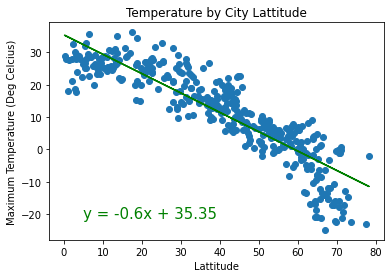

In [32]:
# Linear regression on Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Maximum Temperature (Deg Celcius)')
plt.title("Temperature by City Lattitude")

linreg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],.1,.1)


The r is: 0.5789906416613811
The r-squared is: 0.33523016313145787


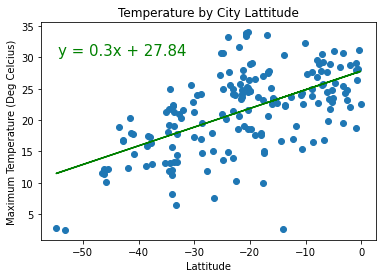

In [34]:
# Linear regression on Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Maximum Temperature (Deg Celcius)')
plt.title("Temperature by City Lattitude")

linreg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],.05,.85)

**Discussion about the linear relationship:** Temperature has a strong correlation with lattitude in both hemispheres, and is particularly closely clustered to the trend line in the northern hemisphere. The further from the equator, the lower the maximum temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r is: 0.2452426562129507
The r-squared is: 0.06014396042638352


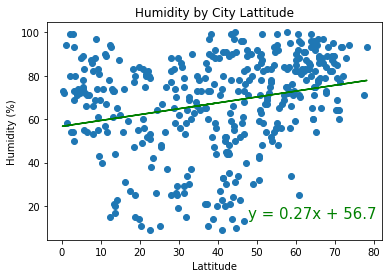

In [35]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

linreg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],.6,.1)

The r is: 0.16060523007138658
The r-squared is: 0.025794039926283017


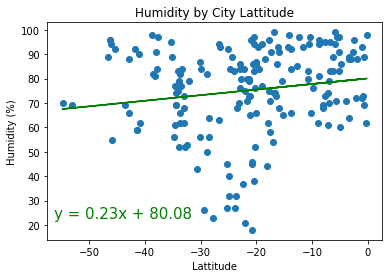

In [39]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Humidity (%)')
plt.title("Humidity by City Lattitude")

linreg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],.02,.1)

**Discussion about the linear relationship:** Humidity and city lattitude do not have a linear relationship in either hemisphere, as indicated by r-squared value of 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r is: 0.14628857989346603
The r-squared is: 0.021400348607246992


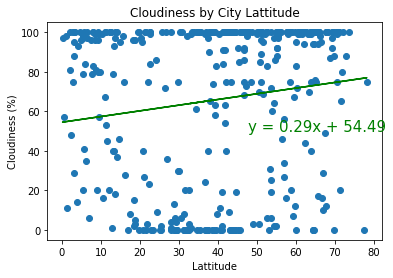

In [41]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

linreg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],.6,.5)

The r is: 0.05645450736763705
The r-squared is: 0.0031871114021225855


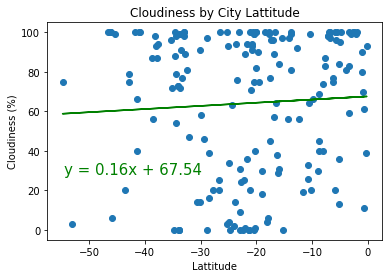

In [44]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

linreg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],.05,.3)

**Discussion about the linear relationship:** Cloud cover and city lattitude do not have a linear relationship in either hemisphere, as indicated by an r-squared value of 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r is: 0.08790157016215754
The r-squared is: 0.007726686036972704


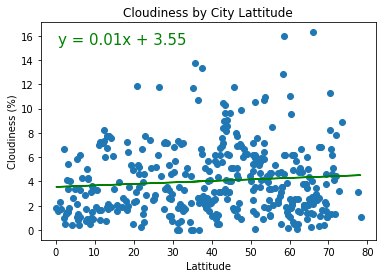

In [48]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

linreg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],.05,.9)

The r is: -0.31954496818592876
The r-squared is: 0.10210898669294623


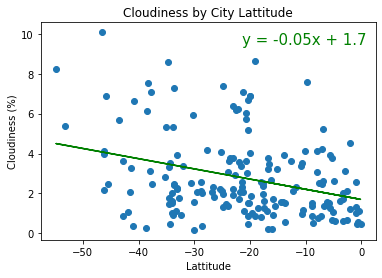

In [53]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness by City Lattitude")

linreg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],.6,.9)

**Discussion about the linear relationship:** Cloudiness and city lattitude do not have a linear relationship in the northern hemisphere, but may have a weak linear relationship in the southern hemisphere, where there is increased cloudiness further from the equator.